![](imagenes/UC_FMRI.jpg)

---
---

***Andres Eduardo Aracena Rangel***

*Estudiante del programa del Magister en Física Médica*

---
---


El siguiente Script de Python forma parte del trabajo especial de grado.

Profesora Guía:

*PhD María Daniela Cornejo*

---

---

&nbsp;
Con referencia:

- [Pagina oficial Nibabel](https://nipy.org/nibabel/index.html) 

Imagenes de fMRI extraidas de OpenNuero:
 
 - [ds002422](https://openneuro.org/datasets/ds002422/versions/1.1.0)
 
 ---
 Acronimos:

- CSF: Cerebrospinal Fluid (*líquido cefalorraquídeo*)
- GM: Gray Matter (*materia gris*)
- WM: White Matter (*materia blanca*)
---
NOTA:
Cuando indiquemos imagenes brain o mascaras brain, nos estamos refieriendo a las imagenes o mascaras de csf, wm, gm

# Promedio de las serie de tiempo de mascaras csf, gm y wm

Del notebook **03_extraccion_series_tiempo_brain_umbral_095.ipynb** se extrajo las series de tiempo que corresponden a las mascaras para csf, gm y wm para el umbral de *0.95*.

En este notebook solo trabajaremos con las mascaras de csf, gm y wm pafa el umbral de 0.95, donde extraeremos su serie de tiempo promedio y normalizada.

&nbsp;
## Importamos librerias


In [1]:
import time # medir el tiempo de ejecución de nuestros programas
start = time.process_time()
inicio = time.time()

In [2]:
import os # El módulo os nos permite acceder a funcionalidades dependientes del Sistema Operativo
from os.path import join as opj # Este método concatena varios componentes de ruta con exactamente un separador de directorio(‘/’)

from nipype import SelectFiles

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from nilearn.plotting import plot_anat
%matplotlib inline

220720-15:35:42,233 nipype.utils WARNING:
	 A newer version (1.8.3) of nipy/nipype is available. You are using 1.7.0


/home/aracena/.local/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## Definimos parámetros

In [3]:
'''
Ruta del directorio de la data
'''
path_data = '/home/aracena/thesis_ds002422/' 

'''
Ruta donde reposa las series de tiempo (y posición de voxels) extraidas de las mascacaras csf, gm y wm
'''
path_ser = opj(path_data,'03_fase2_extraccion_series_tiempo_brain','output')

'''
lista de tejidos a procesar
'''
tejido = ['ser_mask_csf', 'ser_mask_gm', 'ser_mask_wm']

      
'''
Ingrese el umbral de la mascara que se realiza el promedio de sus series
(se extrajeron tres mask brain para tres umbrales distintos)
'''
umbral_sel = '0.95'

'''
Ruta donde se guardaran los resultados
'''
path_out = opj(path_data,'04_fase2_promedio_series_tiempo_brain','output', umbral_sel)

# Ruta donde se guardara archivos csv
path_csv = opj(path_out,'archivos_csv')

# Ruta donde se guardaran las imagenes png
path_png = opj(path_out,'archivos_png')

'''
Creamos la carpeta de salida
'''
os.system('mkdir -p %s'%path_out)
os.system('mkdir -p %s'%path_csv)
os.system('mkdir -p %s'%path_png)

'''
Creamos la carpeta de salida para tablas
'''
path_out_DF = opj(path_out,'tablas_proyecto')
os.system('mkdir -p %s'%path_out_DF);

## Definimos funciones

### Función para graficar series de tiempo

In [4]:
'''
Función grafica las series de tiempo de una DF introducida. Se requiere input:

- df_data = Dataframe que contiene las series de tiempo
- name_save = nombre con que desea guardar el grafico
'''

def plot_series_time(df_data, resaltar, titulo, name_save): 
    # Creamos una lista con las claves del diccionario ingresado
    tejido = list(df_data.keys())
    # definimos una ventana
    vent_min = 50
    vent_max = 75


    font1 = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'}
    font2  = {'fontsize':18, 'fontweight':'bold', 'color':'tab:red'}

    fig, ax = plt.subplots(figsize = (17,8))
    for i,tisue in enumerate(tejido):
        if resaltar == 'all':
            ax.plot(df_data[tisue], linewidth=2, label=tisue)
        else:
            if tisue == resaltar:
                ax.plot(df_data[tisue], linewidth=2, label=tisue)
            else:           
                ax.plot(df_data[tisue], '--.', linewidth=2, label=tisue)

    ax.legend()
    ax.set_xlabel('Tiempo ($\\tau_N$)',fontdict=font1)
    ax.set_ylabel('Señal fMRI',fontdict=font1)
    ax.set_title(titulo, fontdict = font2)
    ax.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
    ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
    ax.axvspan(vent_min,vent_max, alpha=0.3, facecolor='y')

    plt.savefig(opj(path_png, name_save))

## Cargamos datos de las series de tiempo de las mascaras brain

### Interfaz SelectFiles - ser_brain_mask

En esta oportunidad, trabajaremos con interface* SelectFiles*, para extraer las direcciones de las series de tiempo extraidas de las mascaras brain, y posteriormente cargamos sus datos en un diccionario.

Extramos las rutas de las series de tiempo de las mascaras para el umbralestablecido; extracion de series de tiempo en el notebook **03_extraccion_series_tiempo_brain_umbral_095.ipynb**

In [5]:
# La entrada template indica la plantilla de cadena que debe coincidir en el directorio indicado a buscar
templates = {'ser_brain': '{umbral}/archivos_csv/serie_tiempo_all_mask_*.csv'}
       
selectfiles = SelectFiles(templates)


'''
Inputs
- Ubicación de la carpeta del conjunto de datos
- Cadenas de marcador de posición {}
'''
# La entrada base_directory indica en que directorio buscar
selectfiles.inputs.base_directory = path_ser

#Ingresamos la(s) cadena(s) de marcador de posición {} con valores
selectfiles.inputs.umbral = umbral_sel
#selectfiles.inputs.tejido = tejido
#ser_brain_mask.iterables = ('tejido', tejido)

# ejecutamos 
ser_brain_mask = selectfiles.run().outputs

In [6]:
ser_brain_mask


ser_brain = ['/home/aracena/thesis_ds002422/03_fase2_extraccion_series_tiempo_brain/output/0.95/archivos_csv/serie_tiempo_all_mask_csf.csv', '/home/aracena/thesis_ds002422/03_fase2_extraccion_series_tiempo_brain/output/0.95/archivos_csv/serie_tiempo_all_mask_gm.csv', '/home/aracena/thesis_ds002422/03_fase2_extraccion_series_tiempo_brain/output/0.95/archivos_csv/serie_tiempo_all_mask_wm.csv']

### Diccionarios para las series de tiempo de las mascaras brain

In [7]:
ser_all_brain = dict(zip(tejido,ser_brain_mask.ser_brain))
print('series de tiempo de las mascaras\n', ser_all_brain)

series de tiempo de las mascaras
 {'ser_mask_csf': '/home/aracena/thesis_ds002422/03_fase2_extraccion_series_tiempo_brain/output/0.95/archivos_csv/serie_tiempo_all_mask_csf.csv', 'ser_mask_gm': '/home/aracena/thesis_ds002422/03_fase2_extraccion_series_tiempo_brain/output/0.95/archivos_csv/serie_tiempo_all_mask_gm.csv', 'ser_mask_wm': '/home/aracena/thesis_ds002422/03_fase2_extraccion_series_tiempo_brain/output/0.95/archivos_csv/serie_tiempo_all_mask_wm.csv'}


### Cargamos los datos de las series de tiempo

In [8]:
#lista_brain = list(mask.keys()) # extraemos una lista de las mascaras

ser_tiem = {}
for i, tisue in enumerate(ser_all_brain):
    ser_tiem[tisue] = pd.read_csv(ser_all_brain[tisue])

print(ser_tiem['ser_mask_csf'].shape)
print(ser_tiem['ser_mask_wm'].shape)
print(ser_tiem['ser_mask_gm'].shape)

(196, 664)
(196, 9439)
(196, 1794)


In [9]:
pd.options.display.max_columns = 8
ser_tiem['ser_mask_csf']

,42789,42790,42791,42833,...,119220,119224,119225,119226
0,147.668701,199.851395,321.464417,319.859619,...,563.222595,571.135742,569.495667,573.659790
1,147.734985,203.295837,316.090210,320.602753,...,572.265747,574.809692,565.620789,569.487976
2,147.813690,198.290558,318.719666,324.457642,...,579.156067,568.527588,569.592651,570.382019
3,148.630875,207.636703,311.952423,325.447235,...,562.293640,570.185669,564.723206,571.315186
4,148.653290,203.587326,304.501617,329.378143,...,564.004456,575.846069,566.695435,577.148010
...,...,...,...,...,...,...,...,...,...
191,141.190781,206.106812,308.748840,318.514404,...,570.030457,570.975403,568.758972,574.168945
192,148.696869,212.194748,314.824097,325.573364,...,576.565796,573.521729,570.436768,570.730591
193,152.130447,211.498489,313.927216,315.044403,...,569.587463,565.593323,567.328613,574.088501
194,146.669983,214.301300,301.381012,306.016785,...,573.925476,576.993652,574.053040,576.496826


In [10]:
ser_tiem['ser_mask_csf']['42789'].describe()

count    196.000000
mean     143.845704
std        6.412026
min      124.052040
25%      140.418392
50%      144.187172
75%      147.754662
max      160.470428
Name: 42789, dtype: float64

In [11]:
ser_tiem['ser_mask_csf']['119226'].describe()

count    196.000000
mean     572.781509
std        2.955697
min      564.041931
25%      570.722473
50%      572.566437
75%      574.722824
max      580.456299
Name: 119226, dtype: float64

## Cargamos datos del promedio de las series de tiempo de las mascaras brain

### Interfaz SelectFiles - ser_norm_brain_mask

En esta oportunidad, trabajaremos con interface* SelectFiles*, para extraer las direcciones del promedio de las series de tiempo extraidas de las mascaras brain, y posteriormente cargamos sus datos en un diccionario.

Extramos las rutas de las series de tiempo de las mascaras para el umbralestablecido; extracion de series de tiempo en el notebook **03_extraccion_series_tiempo_brain_umbral_095.ipynb**

In [12]:
# La entrada template indica la plantilla de cadena que debe coincidir en el directorio indicado a buscar
templates = {'ser_norm_brain': '{umbral}/archivos_csv/serie_tiempo_all_norm_mask_*.csv'}
       
selectfiles = SelectFiles(templates)


'''
Inputs
- Ubicación de la carpeta del conjunto de datos
- Cadenas de marcador de posición {}
'''
# La entrada base_directory indica en que directorio buscar
selectfiles.inputs.base_directory = path_ser

#Ingresamos la(s) cadena(s) de marcador de posición {} con valores
selectfiles.inputs.umbral = umbral_sel
#selectfiles.inputs.tejido = tejido
#ser_brain_mask.iterables = ('tejido', tejido)

# ejecutamos 
ser_norm_brain_mask = selectfiles.run().outputs

In [13]:
ser_norm_brain_mask


ser_norm_brain = ['/home/aracena/thesis_ds002422/03_fase2_extraccion_series_tiempo_brain/output/0.95/archivos_csv/serie_tiempo_all_norm_mask_csf.csv', '/home/aracena/thesis_ds002422/03_fase2_extraccion_series_tiempo_brain/output/0.95/archivos_csv/serie_tiempo_all_norm_mask_gm.csv', '/home/aracena/thesis_ds002422/03_fase2_extraccion_series_tiempo_brain/output/0.95/archivos_csv/serie_tiempo_all_norm_mask_wm.csv']

### Diccionarios para el promedio de las series de tiempo de las mascaras brain

In [14]:
ser_norm_all_brain = dict(zip(tejido,ser_norm_brain_mask.ser_norm_brain))
print('series de tiempo normalizadas de las mascaras\n', ser_norm_all_brain)

series de tiempo normalizadas de las mascaras
 {'ser_mask_csf': '/home/aracena/thesis_ds002422/03_fase2_extraccion_series_tiempo_brain/output/0.95/archivos_csv/serie_tiempo_all_norm_mask_csf.csv', 'ser_mask_gm': '/home/aracena/thesis_ds002422/03_fase2_extraccion_series_tiempo_brain/output/0.95/archivos_csv/serie_tiempo_all_norm_mask_gm.csv', 'ser_mask_wm': '/home/aracena/thesis_ds002422/03_fase2_extraccion_series_tiempo_brain/output/0.95/archivos_csv/serie_tiempo_all_norm_mask_wm.csv'}


### Cargamos los datos del promedio de las series de tiempo

In [15]:
#lista_brain = list(mask.keys()) # extraemos una lista de las mascaras

ser_tiem_norm = {}
for i, tisue in enumerate(ser_norm_all_brain):
    ser_tiem_norm[tisue] = pd.read_csv(ser_norm_all_brain[tisue])

In [16]:
pd.options.display.max_columns = 8
ser_tiem_norm['ser_mask_csf']

,42789,42790,42791,42833,...,119220,119224,119225,119226
0,0.648482,0.465610,0.696788,0.561077,...,0.326825,0.561927,0.516017,0.585941
1,0.650302,0.557280,0.593478,0.577106,...,0.668015,0.744916,0.311767,0.331785
2,0.652463,0.424070,0.644025,0.660252,...,0.927980,0.432023,0.521129,0.386252
3,0.674902,0.672808,0.513937,0.681597,...,0.291776,0.514607,0.264454,0.443103
4,0.675517,0.565038,0.370708,0.766383,...,0.356324,0.796534,0.368413,0.798452
...,...,...,...,...,...,...,...,...,...
191,0.470607,0.632092,0.452353,0.532062,...,0.583679,0.553941,0.477185,0.616960
192,0.676714,0.794115,0.569139,0.684318,...,0.830251,0.680766,0.565624,0.407488
193,0.770995,0.775585,0.551899,0.457217,...,0.566965,0.285876,0.401789,0.612060
194,0.621058,0.850179,0.310720,0.262500,...,0.730635,0.853692,0.756242,0.758780


## Promediamos las series de tiempo de cada mascara

### Estrategia

Aplicamos la transpuesta del dataframe que contiene las series de tiempo de la mascara que deseamos promediar, asi de esta manera, tendremos en las columnas la variable **tiempo** y aplicamos el método de pandas *mean()* para calcular el promedio de una columna del dataframe. DE esta manera obtenemos la seria promedio de las mascaras brain

In [17]:
ser_tiem['ser_mask_csf']

,42789,42790,42791,42833,...,119220,119224,119225,119226
0,147.668701,199.851395,321.464417,319.859619,...,563.222595,571.135742,569.495667,573.659790
1,147.734985,203.295837,316.090210,320.602753,...,572.265747,574.809692,565.620789,569.487976
2,147.813690,198.290558,318.719666,324.457642,...,579.156067,568.527588,569.592651,570.382019
3,148.630875,207.636703,311.952423,325.447235,...,562.293640,570.185669,564.723206,571.315186
4,148.653290,203.587326,304.501617,329.378143,...,564.004456,575.846069,566.695435,577.148010
...,...,...,...,...,...,...,...,...,...
191,141.190781,206.106812,308.748840,318.514404,...,570.030457,570.975403,568.758972,574.168945
192,148.696869,212.194748,314.824097,325.573364,...,576.565796,573.521729,570.436768,570.730591
193,152.130447,211.498489,313.927216,315.044403,...,569.587463,565.593323,567.328613,574.088501
194,146.669983,214.301300,301.381012,306.016785,...,573.925476,576.993652,574.053040,576.496826


In [18]:
ser_tiem['ser_mask_csf'].T

,0,1,2,3,...,192,193,194,195
42789,147.668701,147.734985,147.813690,148.630875,...,148.696869,152.130447,146.669983,140.227005
42790,199.851395,203.295837,198.290558,207.636703,...,212.194748,211.498489,214.301300,208.586624
42791,321.464417,316.090210,318.719666,311.952423,...,314.824097,313.927216,301.381012,303.595093
42833,319.859619,320.602753,324.457642,325.447235,...,325.573364,315.044403,306.016785,295.467163
42834,390.075043,394.869293,391.678802,387.747406,...,412.295959,415.206024,417.359467,411.607483
...,...,...,...,...,...,...,...,...,...
119219,564.928162,574.859253,582.090027,564.800537,...,570.799500,576.852112,570.077942,574.971375
119220,563.222595,572.265747,579.156067,562.293640,...,576.565796,569.587463,573.925476,568.996338
119224,571.135742,574.809692,568.527588,570.185669,...,573.521729,565.593323,576.993652,571.335266
119225,569.495667,565.620789,569.592651,564.723206,...,570.436768,567.328613,574.053040,571.035278


In [19]:
ser_tiem['ser_mask_csf'].T.mean()

0      608.445532
1      607.909773
2      608.436558
3      606.512312
4      607.254498
          ...    
191    608.981452
192    609.086091
193    608.484934
194    608.888241
195    608.049152
Length: 196, dtype: float64

### Damos un formato a las DF solo para ser extraidas a un documento

In [20]:
df_1 = ser_tiem['ser_mask_csf'].copy()
df_1 = df_1.T
df_1

nomb_colum = df_1.columns.values
a = df_1.index

header = pd.MultiIndex.from_product([['tiempo ($\\tau_N$)'], nomb_colum],
                                    names=[' ','Series de tiempo: '+ 'ser_mask_csf'])
df_1 = pd.DataFrame(df_1.values, columns=header, index = a)

display(df_1.round(3))

tiempo ($\tau_N$)                             \
Series de tiempo: ser_mask_csf               0        1        2        3     
42789                                    147.669  147.735  147.814  148.631   
42790                                    199.851  203.296  198.291  207.637   
42791                                    321.464  316.090  318.720  311.952   
42833                                    319.860  320.603  324.458  325.447   
42834                                    390.075  394.869  391.679  387.747   
...                                          ...      ...      ...      ...   
119219                                   564.928  574.859  582.090  564.801   
119220                                   563.223  572.266  579.156  562.294   
119224                                   571.136  574.810  568.528  570.186   
119225                                   569.496  565.621  569.593  564.723   
119226                                   573.660  569.488  570.382  571.315   

                                ...                                      
Series de tiempo: ser_mask_csf  ...      192      193      194      195  
42789                           ...  148.697  152.130  146.670  140.227  
42790                           ...  212.195  211.498  214.301  208.587  
42791                           ...  314.824  313.927  301.381  303.595  
42833                           ...  325.573  315.044  306.017  295.467  
42834                           ...  412.296  415.206  417.359  411.607  
...                             ...      ...      ...      ...      ...  
119219                          ...  570.799  576.852  570.078  574.971  
119220                          ...  576.566  569.587  573.925  568.996  
119224                          ...  573.522  565.593  576.994  571.335  
119225                          ...  570.437  567.329  574.053  571.035  
119226                          ...  570.731  574.089  576.497  575.821  

[664 rows x 196 columns]

### Promedio de las series de tiempo de las mascaras y posterior normalización

In [21]:
df_brain_val_prom = pd.DataFrame()
df_brain_val_norm_pr = pd.DataFrame()
df_brain_norm_prom = pd.DataFrame()
for i,tisue in enumerate(tejido):   
    '''
    DF de valores promedios de voxel_val y voxel_norm
    '''

    df_brain_val_prom[tisue]=pd.DataFrame(ser_tiem[tisue].T.mean())
    df_brain_val_prom[tisue].columns = [tisue]

    df_brain_val_norm_pr[tisue]=pd.DataFrame(ser_tiem_norm[tisue].T.mean())
    df_brain_val_norm_pr[tisue].columns = [tisue]
    
    '''
    Volvemos a normalizar entre 0 y 1 a df_brain_norm_prom
    '''
    mini = df_brain_val_norm_pr[tisue].min()
    maxi = df_brain_val_norm_pr[tisue].max()
    df_brain_norm_prom[tisue] = (df_brain_val_norm_pr[tisue] - mini)/(maxi-mini)

lista_normalizacion = ['ser_csf_norm', 'ser_gm_norm', 'ser_wm_norm']
df_brain_norm_prom.columns = lista_normalizacion

In [22]:
df_brain_val_prom.round(3)

,ser_mask_csf,ser_mask_gm,ser_mask_wm
0,608.446,544.591,545.955
1,607.910,544.170,545.948
2,608.437,543.839,545.871
3,606.512,543.127,545.200
4,607.254,543.957,545.471
...,...,...,...
191,608.981,544.611,545.935
192,609.086,543.623,545.773
193,608.485,543.943,545.999
194,608.888,544.576,546.369


In [23]:
df_brain_norm_prom.round(3)

,ser_csf_norm,ser_gm_norm,ser_wm_norm
0,0.659,0.691,0.593
1,0.606,0.594,0.608
2,0.676,0.560,0.569
3,0.413,0.408,0.334
4,0.499,0.591,0.417
...,...,...,...
191,0.718,0.687,0.608
192,0.720,0.512,0.551
193,0.633,0.561,0.651
194,0.731,0.673,0.751


### Damos un formato a las DF solo para ser extraidas a un documento

In [24]:
df_1 = df_brain_val_prom['ser_mask_csf'].copy()
df_1 = pd.DataFrame(df_1)

nomb_colum = df_1.columns.values

header = pd.MultiIndex.from_product([[' '], nomb_colum],
                                    names=[' ','tiempo'])
df_1 = pd.DataFrame(df_1.values, columns=header)

df_1.round(3)

,
tiempo,ser_mask_csf
0,608.446
1,607.910
2,608.437
3,606.512
4,607.254
...,...
191,608.981
192,609.086
193,608.485


In [25]:

df_1 = df_brain_val_prom.copy()

new_index = df_1.index+1

nomb_colum = df_1.columns.values

header = pd.MultiIndex.from_product([['Series de tiempo: '], nomb_colum],
                                    names=[' ','tiempo ($\\tau_N$)'])
df_1 = pd.DataFrame(df_1.values, columns=header, index=new_index)

display(df_1.round(3))

Series de tiempo:                         
tiempo ($\tau_N$)       ser_mask_csf ser_mask_gm ser_mask_wm
1                            608.446     544.591     545.955
2                            607.910     544.170     545.948
3                            608.437     543.839     545.871
4                            606.512     543.127     545.200
5                            607.254     543.957     545.471
..                               ...         ...         ...
192                          608.981     544.611     545.935
193                          609.086     543.623     545.773
194                          608.485     543.943     545.999
195                          608.888     544.576     546.369
196                          608.049     544.453     546.134

[196 rows x 3 columns]

In [26]:
df_1 = df_brain_norm_prom.copy()

new_index = df_1.index+1

nomb_colum = df_1.columns.values

header = pd.MultiIndex.from_product([['Series de tiempo: '], nomb_colum],
                                    names=[' ','tiempo ($\\tau_N$)'])
df_1 = pd.DataFrame(df_1.values, columns=header, index=new_index)

display(df_1.round(3))

Series de tiempo:                         
tiempo ($\tau_N$)       ser_csf_norm ser_gm_norm ser_wm_norm
1                              0.659       0.691       0.593
2                              0.606       0.594       0.608
3                              0.676       0.560       0.569
4                              0.413       0.408       0.334
5                              0.499       0.591       0.417
..                               ...         ...         ...
192                            0.718       0.687       0.608
193                            0.720       0.512       0.551
194                            0.633       0.561       0.651
195                            0.731       0.673       0.751
196                            0.626       0.672       0.696

[196 rows x 3 columns]

## Guardamos resultados en formato csv

### Todas las series correspondientes a cada mascara

In [27]:
'''
Las series juntas (val_prom y nor_prom)
'''
name = 'serie_tiempo_brain_val_prom.csv'
df = pd.DataFrame(df_brain_val_prom)
df.to_csv(opj(path_csv,name),index = False)


name = 'serie_tiempo_brain_norm_prom.csv'
df = pd.DataFrame(df_brain_norm_prom)
df.to_csv(opj(path_csv,name),index = False)

In [28]:
'''
Las series por separado
'''
# Promedio global
for i,tisue in enumerate(tejido):  
    #Guardamos sin inde=ice, ya que al cargar se me crea una columna "Unnamed: 0"
    name='serie_tiempo_val_prom_'+tisue+'.csv'
    df_brain_val_prom[tisue].to_csv(opj(path_csv,name),index = False)

# Promedio global normalizado
for i,tisue in enumerate(lista_normalizacion):
    name='serie_tiempo_norm_prom_'+tisue+'.csv'
    df_brain_norm_prom[tisue].to_csv(opj(path_csv,name),index = False)

## Graficamos series de tiempo

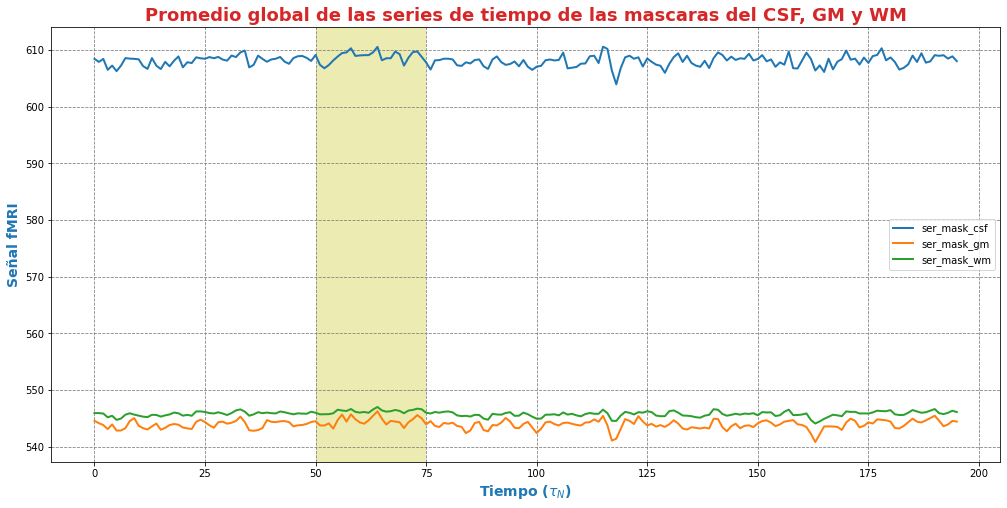

In [29]:
plot_series_time(df_data=df_brain_val_prom,
                 resaltar='all',
                 titulo='Promedio global de las series de tiempo de las mascaras del CSF, GM y WM',
                 name_save='promedio_series_brain_promedio.png')

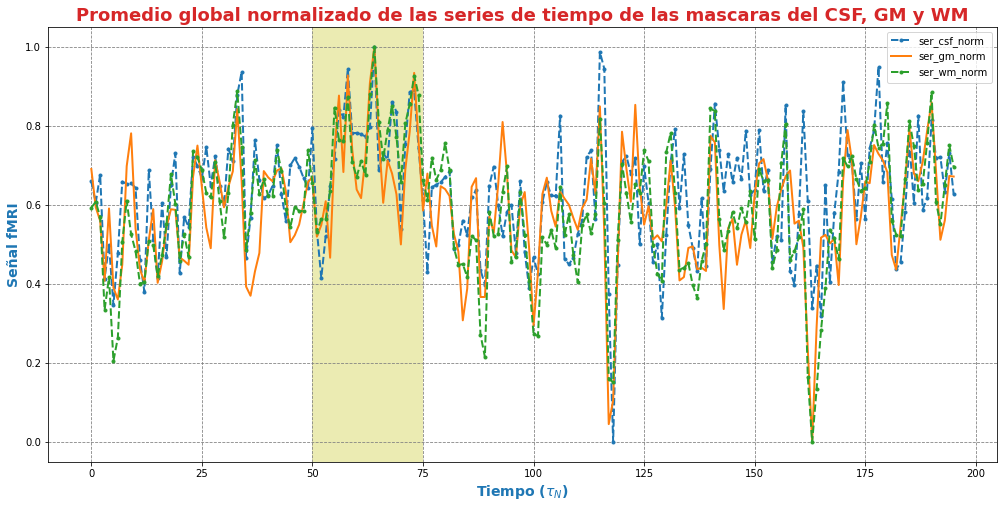

In [30]:
plot_series_time(df_data=df_brain_norm_prom,
                 resaltar='ser_gm_norm',
                 titulo='Promedio global normalizado de las series de tiempo de las mascaras del CSF, GM y WM',
                 name_save= 'promedio_series_brain_normalizados.png')

## Serie minima y maxima de las mascaras brain

### Mascara CSF

El método *describe()* de pandas devuelve información estadística de los datos del dataframe que contiene las series de tiempo. Esta información se muestra en un dataframe que incluye el número de muestras, el valor medio, la desviación estándar, el valor mínimo, máximo, la mediana y los valores correspondientes a los percentiles 25% y 75%.

In [31]:
des_ser_csf = ser_tiem['ser_mask_csf'].copy()
describe_ser_tiem = des_ser_csf.describe()
describe_ser_tiem

,42789,42790,42791,42833,...,119220,119224,119225,119226
count,196.000000,196.000000,196.000000,196.000000,...,196.000000,196.000000,196.000000,196.000000
mean,143.845704,202.322361,310.575427,316.083724,...,567.742519,570.063129,568.635904,572.781509
std,6.412026,6.937895,11.126592,10.064551,...,5.085893,3.726389,3.366868,2.955697
min,124.052040,182.356400,285.217224,293.846619,...,554.560181,559.853638,559.706177,564.041931
25%,140.418392,197.758179,302.775620,308.192780,...,564.096924,567.349548,566.240097,570.722473
50%,144.187172,202.395119,310.293594,316.946075,...,567.895721,570.017426,568.713806,572.566437
75%,147.754662,207.185482,318.061142,323.973434,...,570.521912,572.536346,570.594803,574.722824
max,160.470428,219.930725,337.237640,340.209229,...,581.064941,579.931152,578.677429,580.456299


Usamos el método *mean()* para calcular el promedio de una o las columnas de un dataframe

In [32]:
df_mean_csf = pd.DataFrame(des_ser_csf.mean())
df_mean_csf.columns = ['mean']
df_mean_csf

,mean
42789,143.845704
42790,202.322361
42791,310.575427
42833,316.083724
42834,401.414904
...,...
119219,570.788690
119220,567.742519
119224,570.063129
119225,568.635904


#### Damos un formato a las DF solo para ser extraidas a un documento

In [33]:
df_1 = df_mean_csf.copy()
a = df_1.index

nomb_colum = df_1.columns.values

header = pd.MultiIndex.from_product([[' '], nomb_colum],
                                    names=[' ','Series de tiempo: ser_mask_csf'])
df_1 = pd.DataFrame(df_1.values, columns=header , index=a)

df_1.round(3)

,
Series de tiempo: ser_mask_csf,mean
42789,143.846
42790,202.322
42791,310.575
42833,316.084
42834,401.415
...,...
119219,570.789
119220,567.743
119224,570.063


##### Extraemos las series con la media minima y maxima de las series de la mascara

In [34]:
df_mean_csf.describe()

,mean
count,664.000000
mean,608.159373
std,113.763922
min,64.427639
25%,558.542285
50%,597.504147
75%,668.794970
max,922.165639


##### Indice de la posición de la serie con la media minima

In [35]:
mini = df_mean_csf.min()[0]
mini

64.42763869616451

In [36]:
df_min = df_mean_csf.loc[df_mean_csf['mean'] == mini]
df_min 

,mean
75865,64.427639


In [37]:
indice_min = df_min.index[0]
indice_min

'75865'

##### Indice de la posición de la serie con la media maxima

In [38]:
maxi = df_mean_csf.max()[0]
maxi

922.1656385149274

In [39]:
df_max = df_mean_csf.loc[df_mean_csf['mean'] == maxi]
df_max

,mean
81026,922.165639


In [40]:
indice_max = df_max.index[0]
indice_max

'81026'

#### Extraemos series con valor medio y maximo, y unimos en un dataframe con la serie promedio

In [41]:
df_ser_prom = pd.merge(ser_tiem['ser_mask_csf'][indice_min], df_brain_val_prom['ser_mask_csf'],
                      right_index=True,left_index=True)

df_ser_prom

,75865,ser_mask_csf
0,66.263428,608.445532
1,65.522972,607.909773
2,61.439159,608.436558
3,70.885429,606.512312
4,63.945847,607.254498
...,...,...
191,59.945614,608.981452
192,63.305862,609.086091
193,63.578461,608.484934
194,67.099892,608.888241


In [42]:
df_ser_prom = pd.merge(df_ser_prom, ser_tiem['ser_mask_csf'][indice_max],
                      right_index=True,left_index=True)

df_ser_prom.columns = ['ser_mask_csf_min: '+ indice_min , 'ser_mask_csf', 'ser_mask_csf_max: '+ indice_max]

df_ser_prom.round(3)

,ser_mask_csf_min: 75865,ser_mask_csf,ser_mask_csf_max: 81026
0,66.263,608.446,921.974
1,65.523,607.910,917.137
2,61.439,608.437,929.047
3,70.885,606.512,917.988
4,63.946,607.254,922.704
...,...,...,...
191,59.946,608.981,920.454
192,63.306,609.086,910.552
193,63.578,608.485,941.545
194,67.100,608.888,928.121


#### Damos un formato a las DF solo para ser extraidas a un documento

In [43]:
df_1 = df_ser_prom.copy()
a = df_1.index

nomb_colum = df_1.columns.values

header = pd.MultiIndex.from_product([['Series de tiempo:'], nomb_colum],
                                    names=[' ',' tiempo'])
df_1 = pd.DataFrame(df_1.values, columns=header , index=a)

df_1.round(3)

Series de tiempo:                                     
 tiempo ser_mask_csf_min: 75865 ser_mask_csf ser_mask_csf_max: 81026
0                        66.263      608.446                 921.974
1                        65.523      607.910                 917.137
2                        61.439      608.437                 929.047
3                        70.885      606.512                 917.988
4                        63.946      607.254                 922.704
..                          ...          ...                     ...
191                      59.946      608.981                 920.454
192                      63.306      609.086                 910.552
193                      63.578      608.485                 941.545
194                      67.100      608.888                 928.121
195                      66.717      608.049                 918.533

[196 rows x 3 columns]

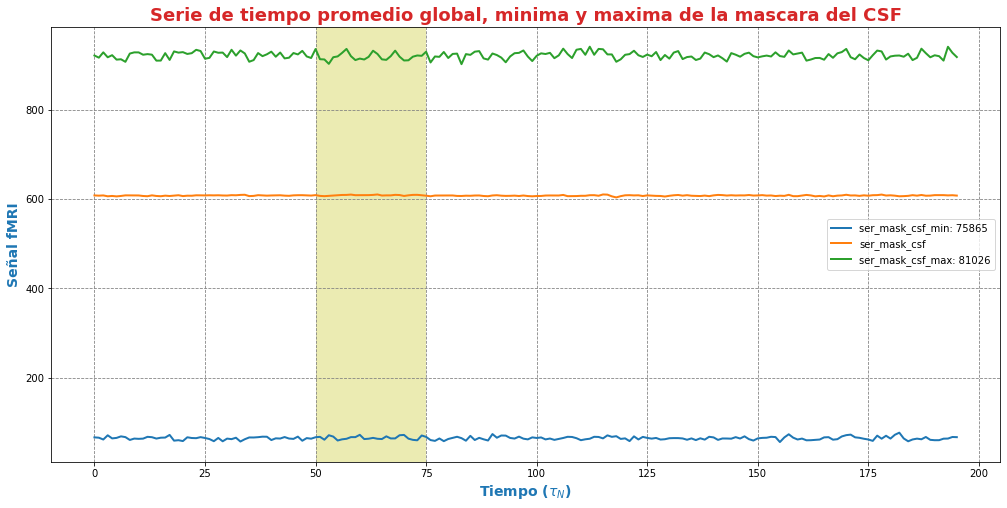

In [44]:
plot_series_time(df_data=df_ser_prom,
                  resaltar = 'all',
                  titulo='Serie de tiempo promedio global, minima y maxima de la mascara del CSF',
                  name_save='promedio_min_max_series_csf_promedio.png')

#### Valor del delta serie

In [45]:
delta_s = maxi - mini
delta_s

857.7379998187629

#### Dataframe con los valores minmo, maximo y delta s

In [46]:
df_resum_csf=pd.DataFrame()

df_resum_csf['media_maximo']=[maxi]
df_resum_csf['media_minimo']=[mini]
df_resum_csf['delta_s']=[delta_s]

df_resum_csf.index = ['ser_mask_csf ' + '( ' + indice_max + ' / '+indice_min + ' )']

df_resum_csf.round(3)

,media_maximo,media_minimo,delta_s
ser_mask_csf ( 81026 / 75865 ),922.166,64.428,857.738


#### Extraemos las series con la media minima y maxima de las series normalizadas de la mascara

Ya con el paso anterior, obtuvimos el indice donde la media es minima y maxima. Ahora graficaremos las series normalizadas de la serie minima y maxima normalizada.


In [47]:
df_ser_prom_norm = pd.merge(ser_tiem_norm['ser_mask_csf'][indice_min], df_brain_norm_prom['ser_csf_norm'],
                      right_index=True,left_index=True)

df_ser_prom_norm

,75865,ser_csf_norm
0,0.498955,0.659252
1,0.463649,0.605535
2,0.268926,0.676476
3,0.719340,0.413124
4,0.388449,0.499224
...,...,...
191,0.197711,0.718453
192,0.357934,0.720197
193,0.370932,0.632843
194,0.538839,0.731416


In [48]:
df_ser_prom_norm= pd.merge(df_ser_prom_norm, ser_tiem_norm['ser_mask_csf'][indice_max],
                           right_index=True,left_index=True)

df_ser_prom_norm.columns = ['ser_csf_norm_min: '+ indice_min , 
                            'ser_csf_norm','ser_csf_norm_max: '+ indice_max]

df_ser_prom_norm.round(3)

,ser_csf_norm_min: 75865,ser_csf_norm,ser_csf_norm_max: 81026
0,0.499,0.659,0.495
1,0.464,0.606,0.372
2,0.269,0.676,0.676
3,0.719,0.413,0.394
4,0.388,0.499,0.514
...,...,...,...
191,0.198,0.718,0.456
192,0.358,0.720,0.204
193,0.371,0.633,0.995
194,0.539,0.731,0.652


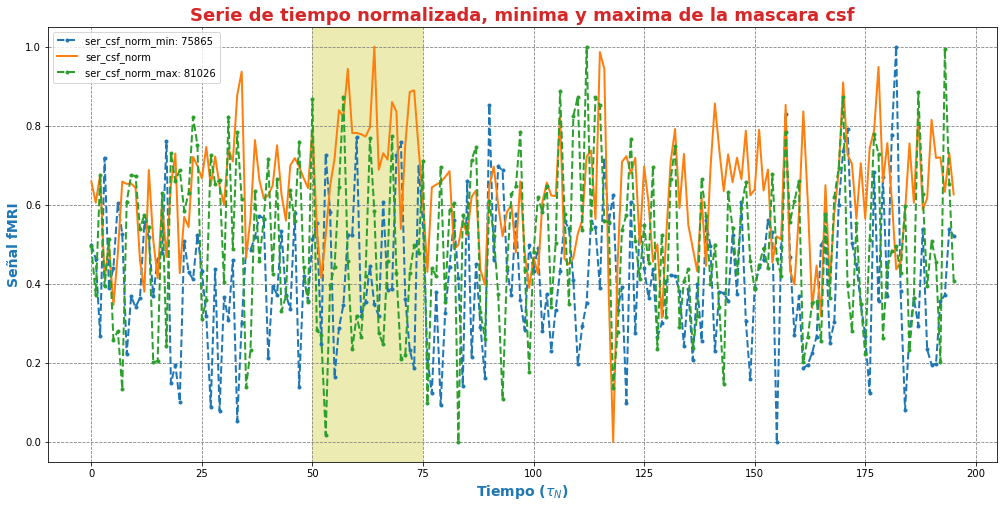

In [49]:
plot_series_time(df_data=df_ser_prom_norm,
                 resaltar='ser_csf_norm',
                 titulo='Serie de tiempo normalizada, minima y maxima de la mascara csf',
                 name_save='promedio_min_max_series_csf_normalizada.png')

### Mascara WM

El método *describe()* de pandas devuelve información estadística de los datos del dataframe que contiene las series de tiempo. Esta información se muestra en un dataframe que incluye el número de muestras, el valor medio, la desviación estándar, el valor mínimo, máximo, la mediana y los valores correspondientes a los percentiles 25% y 75%.

In [50]:
des_ser_wm = ser_tiem['ser_mask_wm'].copy()
describe_ser_tiem = des_ser_wm.describe()
describe_ser_tiem

,45521,45522,45523,45565,...,149135,149177,149178,149179
count,196.000000,196.000000,196.000000,196.000000,...,196.000000,196.000000,196.000000,196.000000
mean,555.897300,534.758260,533.603087,612.363110,...,692.023466,698.832529,685.333921,680.917205
std,5.006519,4.988228,6.194605,5.028651,...,4.059590,4.815791,4.361181,3.911072
min,534.575439,520.986633,518.799011,597.848816,...,680.227661,683.616455,670.474426,670.186157
25%,552.531708,531.670776,529.363571,609.135986,...,689.090729,695.592896,682.498550,678.546143
50%,556.107147,534.719635,532.927673,612.067902,...,691.675476,698.884033,685.389557,680.894043
75%,559.507309,537.724228,537.038651,615.536652,...,694.738037,702.320755,687.894119,683.410370
max,566.315857,551.319763,551.006042,626.899170,...,701.434448,709.175476,698.007935,694.100830


Usamos el método *mean()* para calcular el promedio de una o las columnas de un dataframe

In [51]:
df_mean_wm = pd.DataFrame(des_ser_wm.mean())
df_mean_wm.columns = ['mean']
df_mean_wm

,mean
45521,555.897300
45522,534.758260
45523,533.603087
45565,612.363110
45566,582.932499
...,...
149134,696.758576
149135,692.023466
149177,698.832529
149178,685.333921


#### Damos un formato a las DF solo para ser extraidas a un documento

In [52]:
df_1 = df_mean_wm.copy()
a = df_1.index

nomb_colum = df_1.columns.values

header = pd.MultiIndex.from_product([[' '], nomb_colum],
                                    names=[' ','Series de tiempo: ser_mask_wm'])
df_1 = pd.DataFrame(df_1.values, columns=header , index=a)

df_1.round(3)

,
Series de tiempo: ser_mask_wm,mean
45521,555.897
45522,534.758
45523,533.603
45565,612.363
45566,582.932
...,...
149134,696.759
149135,692.023
149177,698.833


##### Extraemos las series con la media minima y maxima de las series de la mascara

In [53]:
df_mean_wm.describe()

,mean
count,9439.000000
mean,545.843200
std,64.932248
min,82.636580
25%,512.450809
50%,541.182576
75%,580.969103
max,873.078028


##### Indice de la posición de la serie con la media minima

In [54]:
mini = df_mean_wm.min()[0]
mini

82.6365804088359

In [55]:
df_min = df_mean_wm.loc[df_mean_wm['mean'] == mini]
df_min 

,mean
91542,82.63658


In [56]:
indice_min = df_min.index[0]
indice_min

'91542'

##### Indice de la posición de la serie con la media maxima

In [57]:
maxi = df_mean_wm.max()[0]
maxi

873.0780284648039

In [58]:
df_max = df_mean_wm.loc[df_mean_wm['mean'] == maxi]
df_max

,mean
81028,873.078028


In [59]:
indice_max = df_max.index[0]
indice_max

'81028'

#### Extraemos series con valor medio y maximo, y unimos en un dataframe con la serie promedio

In [60]:
df_ser_prom = pd.merge(ser_tiem['ser_mask_wm'][indice_min], df_brain_val_prom['ser_mask_wm'],
                      right_index=True,left_index=True)

df_ser_prom

,91542,ser_mask_wm
0,84.225327,545.955034
1,83.050209,545.948231
2,80.822769,545.871291
3,82.302864,545.199905
4,73.546555,545.471301
...,...,...
191,86.655235,545.935069
192,71.720085,545.772953
193,85.391243,545.998505
194,80.654205,546.368934


In [61]:
df_ser_prom = pd.merge(df_ser_prom, ser_tiem['ser_mask_wm'][indice_max],
                      right_index=True,left_index=True)

df_ser_prom.columns = ['ser_mask_wm_min: '+ indice_min , 'ser_mask_wm', 'ser_mask_wm_max: '+ indice_max]

df_ser_prom

,ser_mask_wm_min: 91542,ser_mask_wm,ser_mask_wm_max: 81028
0,84.225327,545.955034,873.025146
1,83.050209,545.948231,873.457520
2,80.822769,545.871291,881.208435
3,82.302864,545.199905,872.882141
4,73.546555,545.471301,863.315063
...,...,...,...
191,86.655235,545.935069,870.097900
192,71.720085,545.772953,874.667297
193,85.391243,545.998505,875.916260
194,80.654205,546.368934,880.344482


#### Damos un formato a las DF solo para ser extraidas a un documento

In [62]:
df_1 = df_ser_prom.copy()
a = df_1.index

nomb_colum = df_1.columns.values

header = pd.MultiIndex.from_product([['Series de tiempo:'], nomb_colum],
                                    names=[' ',' tiempo'])
df_1 = pd.DataFrame(df_1.values, columns=header , index=a)

df_1.round(3)

Series de tiempo:                                   
 tiempo ser_mask_wm_min: 91542 ser_mask_wm ser_mask_wm_max: 81028
0                       84.225     545.955                873.025
1                       83.050     545.948                873.458
2                       80.823     545.871                881.208
3                       82.303     545.200                872.882
4                       73.547     545.471                863.315
..                         ...         ...                    ...
191                     86.655     545.935                870.098
192                     71.720     545.773                874.667
193                     85.391     545.999                875.916
194                     80.654     546.369                880.344
195                     71.293     546.134                868.240

[196 rows x 3 columns]

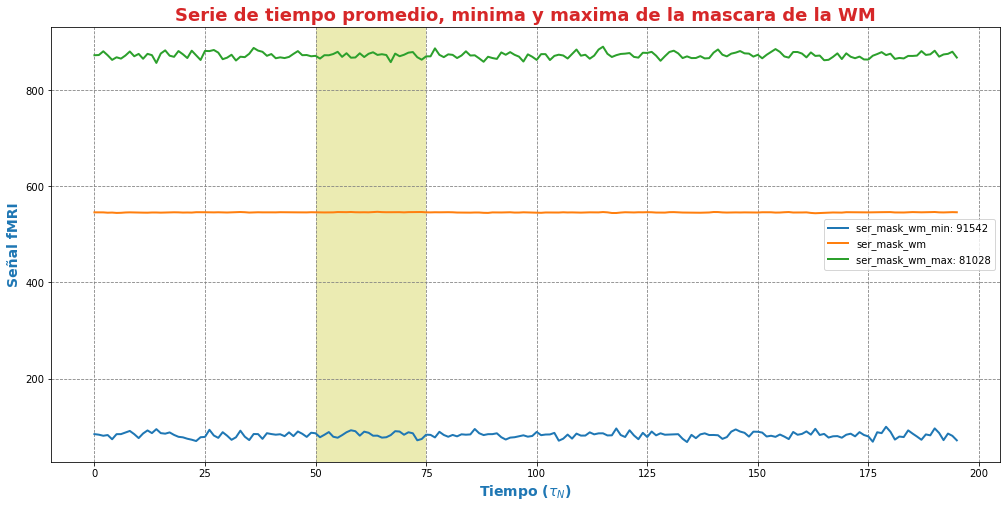

In [63]:
plot_series_time(df_data=df_ser_prom,
                 resaltar='all',
                 titulo='Serie de tiempo promedio, minima y maxima de la mascara de la WM',
                 name_save='promedio_min_max_series_wm_promedio.png')

#### Valor del deta serie

In [64]:
delta_s_wm = maxi - mini
delta_s_wm

790.441448055968

#### Dataframe con los valores minmo, maximo y delta s

In [65]:
df_resum_wm=pd.DataFrame()

df_resum_wm['media_maximo']=[maxi]
df_resum_wm['media_minimo']=[mini]
df_resum_wm['delta_s']=[delta_s_wm]

df_resum_wm.index = ['ser_mask_wm ' + '( ' + indice_max + ' / '+indice_min + ' )']

df_resum_wm.round(3)

,media_maximo,media_minimo,delta_s
ser_mask_wm ( 81028 / 91542 ),873.078,82.637,790.441


#### Unimos las dos dataframe de los valores minimo y maximo

In [66]:
df_resum_final = pd.concat([df_resum_csf, df_resum_wm])
df_resum_final

,media_maximo,media_minimo,delta_s
ser_mask_csf ( 81026 / 75865 ),922.165639,64.427639,857.738000
ser_mask_wm ( 81028 / 91542 ),873.078028,82.636580,790.441448


#### Damos un formato a las DF solo para ser extraidas a un documento

In [67]:
df_1 = df_resum_final.copy()
a = df_1.index

nomb_colum = df_1.columns.values

header = pd.MultiIndex.from_product([[''], nomb_colum],
                                    names=[' ',' serie_tiempo ( mínima / máxima )'])
df_1 = pd.DataFrame(df_1.values, columns=header , index=a)

df_1.round(3)

serie_tiempo ( mínima / máxima ) media_maximo media_minimo  delta_s
ser_mask_csf ( 81026 / 75865 )         922.166       64.428  857.738
ser_mask_wm ( 81028 / 91542 )          873.078       82.637  790.441

#### Extraemos las series con la media minima y maxima de las series normalizadas de la mascara

Ya con el paso anterior, obtuvimos el indice donde la media es minima y maxima. Ahora graficaremos las series normalizadas de la serie minima y maxima normalizada.


In [68]:
df_ser_prom_norm = pd.merge(ser_tiem_norm['ser_mask_wm'][indice_min], df_brain_norm_prom['ser_wm_norm'],
                      right_index=True,left_index=True)

df_ser_prom_norm.round(3)

,91542,ser_wm_norm
0,0.518,0.593
1,0.481,0.608
2,0.411,0.569
3,0.458,0.334
4,0.182,0.417
...,...,...
191,0.594,0.608
192,0.125,0.551
193,0.555,0.651
194,0.406,0.751


In [69]:
df_ser_prom_norm= pd.merge(df_ser_prom_norm, ser_tiem_norm['ser_mask_wm'][indice_max],
                           right_index=True,left_index=True)

df_ser_prom_norm.columns = ['ser_wm_norm_min: '+ indice_min , 
                            'ser_wm_norm','ser_wm_norm_max: '+ indice_max]

df_ser_prom_norm.round(3)

,ser_wm_norm_min: 91542,ser_wm_norm,ser_wm_norm_max: 81028
0,0.518,0.593,0.474
1,0.481,0.608,0.487
2,0.411,0.569,0.716
3,0.458,0.334,0.470
4,0.182,0.417,0.187
...,...,...,...
191,0.594,0.608,0.387
192,0.125,0.551,0.522
193,0.555,0.651,0.559
194,0.406,0.751,0.690


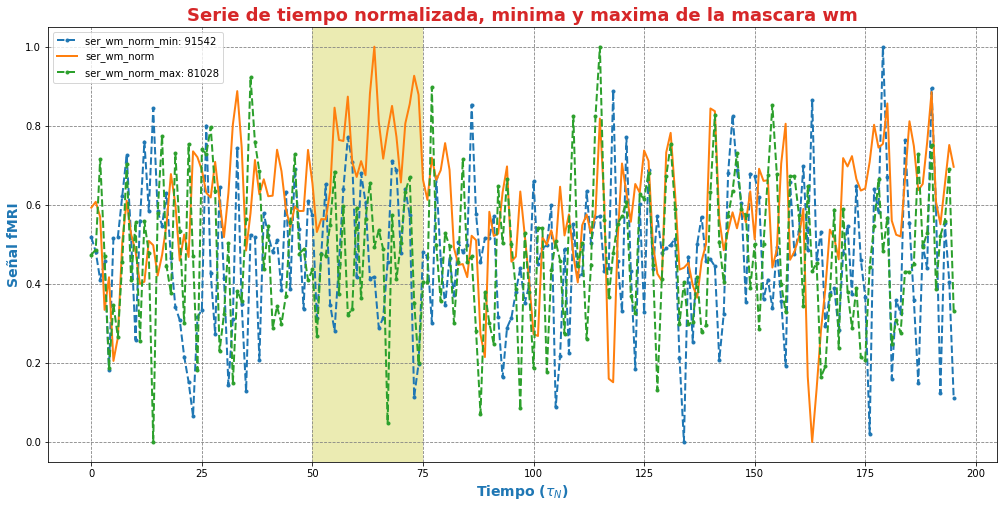

In [70]:
plot_series_time(df_data=df_ser_prom_norm,
                 resaltar='ser_wm_norm',
                 titulo='Serie de tiempo normalizada, minima y maxima de la mascara wm',
                 name_save='promedio_min_max_series_wm_normalizada.png')

## Tiempo de ejecución

In [71]:
fin = time.time()
end = time.process_time()
tiempo = fin - inicio
tiempo2 = end - start

print('-----------------------------\n', 
      'tiempo de ejecución\n\n', tiempo, 'seg\n', tiempo/60, 'min\n',      
     '-----------------------------\n')
print('---------------------------------------\n', 
      'tiempo de ejecución del sistema y CPU\n\n', tiempo2, 'seg\n', tiempo2/60, 'min\n',   
     '---------------------------------------\n')

-----------------------------
 tiempo de ejecución

 29.080620527267456 seg
 0.4846770087877909 min
 -----------------------------

---------------------------------------
 tiempo de ejecución del sistema y CPU

 25.87978398 seg
 0.431329733 min
 ---------------------------------------



&nbsp;
## Fin